# **Project Name**    - Fed-Ex- Logistics.

##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**

Write the summary here within 500-600 words.

This project analyzes a real-world logistics dataset from FedEx Logistics, aiming to optimize delivery timelines, reduce costs, and enhance overall supply chain efficiency. The dataset includes information related to purchase orders, shipment methods, vendor terms, product types, delivery schedules, and cost components like insurance and freight.

Through data cleaning, exploration, visualization, and correlation analysis, we investigate patterns such as:

On-time delivery trends

Impact of shipment modes (air/sea)

Vendor performance based on INCO terms

Cost relationships (e.g., weight vs insurance)

This analytical project is critical for identifying bottlenecks, improving delivery reliability, and achieving cost-effective logistics operations.

# **GitHub Link -**

Provide your GitHub Link here.
https://github.com/kambirereshma88/Labmentix-FED-Ex-Project-.git

# **Problem Statement**


**Write Problem Statement Here.**

The primary goal is to determine the factors that affect on-time deliveries and shipping costs, particularly:

Are projects managed by certain teams (e.g., PMO - US) more efficient in delivering on time?

Does shipment mode (air, sea) affect delivery performance?

Do certain destination countries experience more delivery delays?

How do delivery lead times (difference between PO sent and scheduled delivery date) impact outcomes?

Do INCO terms (vendor agreement types) correlate with performance?

Is there a positive correlation between shipment weight and insurance costs?

#### **Define Your Business Objective?**

Answer Here

The primary business objective of this project is to analyze and optimize FedEx's global logistics operations by identifying key factors that impact delivery performance and cost efficiency. With growing demands in e-commerce and international shipping, FedEx aims to:

Ensure timely deliveries by understanding patterns and delays in the supply chain

Minimize freight and insurance costs without compromising service quality

Improve vendor coordination through insights into INCO terms and shipment agreements

Support data-driven decision making for strategic planning and operational enhancements

By achieving these objectives, FedEx can enhance customer satisfaction, reduce logistics bottlenecks, and maintain a competitive edge in the global supply chain market.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [37]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Set plot style
sns.set(style="whitegrid")

### Dataset Loading

In [2]:
# Load Dataset
df=pd.read_csv("SCMS_Delivery_History_Dataset.csv")

### Dataset First View

In [4]:
# Dataset First Look
df.head()

ID Project Code            PQ # PO / SO # ASN/DN #        Country  \
0   1   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8  C√¥te d'Ivoire   
1   3   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   
2   4   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14  C√¥te d'Ivoire   
3  15   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   
4  16   108-VN-T01  Pre-PQ Process   SCMS-81   ASN-55        Vietnam   

  Managed By  Fulfill Via Vendor INCO Term Shipment Mode  ...  \
0   PMO - US  Direct Drop              EXW           Air  ...   
1   PMO - US  Direct Drop              EXW           Air  ...   
2   PMO - US  Direct Drop              FCA           Air  ...   
3   PMO - US  Direct Drop              EXW           Air  ...   
4   PMO - US  Direct Drop              EXW           Air  ...   

  Unit of Measure (Per Pack) Line Item Quantity Line Item Value Pack Price  \
0                         30                 19           551.0      29.00   
1                        240               1000          6200.0       6.20   
2                        100                500         40000.0      80.00   
3                         60              31920        127360.8       3.99   
4                         60              38000        121600.0       3.20   

  Unit Price             Manufacturing Site First Line Designation  \
0       0.97     Ranbaxy Fine Chemicals LTD                    Yes   
1       0.03      Aurobindo Unit III, India                    Yes   
2       0.80  ABBVIE GmbH & Co.KG Wiesbaden                    Yes   
3       0.07  Ranbaxy, Paonta Shahib, India                    Yes   
4       0.05      Aurobindo Unit III, India                    Yes   

  Weight (Kilograms) Freight Cost (USD) Line Item Insurance (USD)  
0                 13             780.34                       NaN  
1                358             4521.5                       NaN  
2                171            1653.78                       NaN  
3               1855           16007.06                       NaN  
4               7590           45450.08                       NaN  

[5 rows x 33 columns]

### Dataset Rows & Columns count

In [14]:
# Dataset Rows & Columns count
df.shape  
print(df.shape)

(10324, 33)


### Dataset Information

In [16]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

#### Duplicate Values

In [20]:
# Dataset Duplicate Value Count
duplicate_count= df.duplicated().sum()
print(f"Total duplicates rows:{duplicate_count}")

Total duplicates rows:0


#### Missing Values/Null Values

In [28]:
# Missing Values/Null Values Count
missing_values = df.isnull().sum()
missing_values[missing_values > 0]
#This will return only those columns from the dataset that have missing (null) values, along with the count.


Shipment Mode                 360
Dosage                       1736
Line Item Insurance (USD)     287
dtype: int64

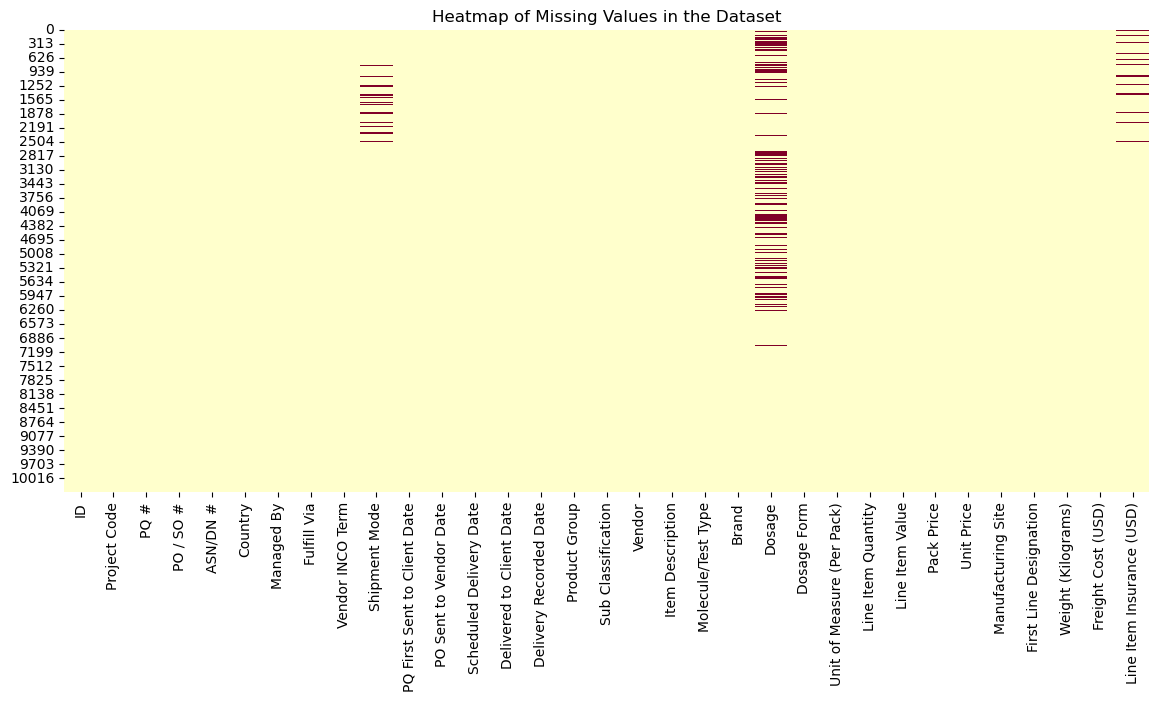

In [25]:
# Visualizing the missing values
plt.figure(figsize=(14,6))
sns.heatmap(df.isnull(), cbar=False, cmap='YlOrRd')
plt.title("Heatmap of Missing Values in the Dataset")
plt.show()

### What did you know about your dataset?

Answer Here

After exploring the dataset:

It has 10,324 records and 34 features.

Some columns have missing values, especially in date or cost-related fields.

Duplicate rows (if any) can be dropped to clean the data.

The dataset captures logistics details such as:

Shipment dates, destinations, vendors, freight cost, insurance, weights, etc.

The data types are mixed (object, float, int), so type conversion will be necessary for analysis.

This dataset is rich for analyzing shipping trends, cost patterns, and on-time performance.

## ***2. Understanding Your Variables***

In [27]:
# Dataset Columns
df.columns.tolist()    #This will give you a list of all column names (variables) in the dataset.

['ID',
 'Project Code',
 'PQ #',
 'PO / SO #',
 'ASN/DN #',
 'Country',
 'Managed By',
 'Fulfill Via',
 'Vendor INCO Term',
 'Shipment Mode',
 'PQ First Sent to Client Date',
 'PO Sent to Vendor Date',
 'Scheduled Delivery Date',
 'Delivered to Client Date',
 'Delivery Recorded Date',
 'Product Group',
 'Sub Classification',
 'Vendor',
 'Item Description',
 'Molecule/Test Type',
 'Brand',
 'Dosage',
 'Dosage Form',
 'Unit of Measure (Per Pack)',
 'Line Item Quantity',
 'Line Item Value',
 'Pack Price',
 'Unit Price',
 'Manufacturing Site',
 'First Line Designation',
 'Weight (Kilograms)',
 'Freight Cost (USD)',
 'Line Item Insurance (USD)']

In [30]:
# Dataset Describe
df.describe(include="all")

#This will provide:

#Count of non-null values

#Unique values (for categorical)

#Mean, std, min, max (for numeric)

#Top & freq (for object/text data)


ID Project Code            PQ #    PO / SO #   ASN/DN #  \
count   10324.000000        10324           10324        10324      10324   
unique           NaN          142            1237         6233       7030   
top              NaN   116-ZA-T30  Pre-PQ Process  SCMS-199289  ASN-19166   
freq             NaN          768            2681           67         54   
mean    51098.968229          NaN             NaN          NaN        NaN   
std     31944.332496          NaN             NaN          NaN        NaN   
min         1.000000          NaN             NaN          NaN        NaN   
25%     12795.750000          NaN             NaN          NaN        NaN   
50%     57540.500000          NaN             NaN          NaN        NaN   
75%     83648.250000          NaN             NaN          NaN        NaN   
max     86823.000000          NaN             NaN          NaN        NaN   

             Country Managed By Fulfill Via Vendor INCO Term Shipment Mode  \
count          10324      10324       10324            10324          9964   
unique            43          4           2                8             4   
top     South Africa   PMO - US    From RDC   N/A - From RDC           Air   
freq            1406      10265        5404             5404          6113   
mean             NaN        NaN         NaN              NaN           NaN   
std              NaN        NaN         NaN              NaN           NaN   
min              NaN        NaN         NaN              NaN           NaN   
25%              NaN        NaN         NaN              NaN           NaN   
50%              NaN        NaN         NaN              NaN           NaN   
75%              NaN        NaN         NaN              NaN           NaN   
max              NaN        NaN         NaN              NaN           NaN   

        ... Unit of Measure (Per Pack) Line Item Quantity Line Item Value  \
count   ...               10324.000000       10324.000000    1.032400e+04   
unique  ...                        NaN                NaN             NaN   
top     ...                        NaN                NaN             NaN   
freq    ...                        NaN                NaN             NaN   
mean    ...                  77.990895       18332.534870    1.576506e+05   
std     ...                  76.579764       40035.302961    3.452921e+05   
min     ...                   1.000000           1.000000    0.000000e+00   
25%     ...                  30.000000         408.000000    4.314593e+03   
50%     ...                  60.000000        3000.000000    3.047147e+04   
75%     ...                  90.000000       17039.750000    1.664471e+05   
max     ...                1000.000000      619999.000000    5.951990e+06   

          Pack Price    Unit Price         Manufacturing Site  \
count   10324.000000  10324.000000                      10324   
unique           NaN           NaN                         88   
top              NaN           NaN  Aurobindo Unit III, India   
freq             NaN           NaN                       3172   
mean       21.910241      0.611701                        NaN   
std        45.609223      3.275808                        NaN   
min         0.000000      0.000000                        NaN   
25%         4.120000      0.080000                        NaN   
50%         9.300000      0.160000                        NaN   
75%        23.592500      0.470000                        NaN   
max      1345.640000    238.650000                        NaN   

       First Line Designation          Weight (Kilograms)  \
count                   10324                       10324   
unique                      2                        4688   
top                       Yes  Weight Captured Separately   
freq                     7030                        1507   
mean                      NaN                         NaN   
std                       NaN                         NaN   
min                    

### Variables Description

Answer Here

### üìò Variable Description Table

| Column Name                   | Description                                                |
|------------------------------|------------------------------------------------------------|
| ID                           | Unique ID for each logistics record                        |
| Project Code                 | Code representing shipment project                         |
| PQ#                          | Price Quotation reference                                  |
| PO/SO#                       | Purchase or Sales Order number                             |
| ASNIDN #                     | Advanced Shipment Notice or Delivery Note                  |
| Country                      | Destination country                                        |
| Managed By                   | Team managing the project (e.g., PMO - US)                 |
| Fulfill Via                  | Shipment method (e.g., drop shipment)                      |
| Vendor INCO Term             | Shipment agreement type (e.g., EXW, FCA)                   |
| Shipment Mode                | Mode of transportation (air, sea, etc.)                    |
| PQ First Sent to Client      | Date PQ was sent                                           |
| PO Sent to Vendor Date       | Date PO sent to vendor                                     |
| Scheduled Delivery Date      | Expected delivery date                                     |
| Brand                        | Product brand                                              |
| Dosage                       | Dosage strength of pharmaceutical product                  |
| Dosage Form                  | Form of the product (e.g., test kit, oral suspension)      |
| Line Item Quantity           | Quantity shipped                                           |
| Line Item Value              | Total value of the item                                    |
| Pack Price                   | Price per pack                                             |
| Unit Price                   | Price per unit                                             |
| Manufacturing Site           | Where product was manufactured                             |
| Weight (Kilograms)           | Shipment weight                                            |
| Freight Cost (USD)           | Shipping cost                                              |
| Line Item Insurance (USD)    | Insurance cost for the line item                           |


### Check Unique Values for each variable.

In [31]:
# Check Unique Values for each variable.
df.nunique().sort_values(ascending=False)
#This will give you the number of unique values per column, sorted from most to least.

ID                              10324
Line Item Value                  8741
ASN/DN #                         7030
Freight Cost (USD)               6733
Line Item Insurance (USD)        6722
PO / SO #                        6233
Line Item Quantity               5065
Weight (Kilograms)               4688
Delivered to Client Date         2093
Delivery Recorded Date           2042
Scheduled Delivery Date          2006
PQ #                             1237
Pack Price                       1175
PO Sent to Vendor Date            897
PQ First Sent to Client Date      765
Item Description                  184
Unit Price                        183
Project Code                      142
Manufacturing Site                 88
Molecule/Test Type                 86
Vendor                             73
Dosage                             54
Brand                              48
Country                            43
Unit of Measure (Per Pack)         31
Dosage Form                        17
Vendor INCO 

In [33]:
 #Optional (for better display in a table)
#To view both the count and a few unique values per column, we can use:

In [35]:
for col in df.columns:
    print(f"{col} ‚ûú {df[col].nunique()} unique values")
    print(f"Sample values: {df[col].unique()[:5]}")
    print("-" * 50)   #This line prints 50 hyphens (-) as a visual separator between the outputs for each column.

#This prints:

#Number of unique values per column

#First 5 sample values for quick understanding


ID ‚ûú 10324 unique values
Sample values: [ 1  3  4 15 16]
--------------------------------------------------
Project Code ‚ûú 142 unique values
Sample values: ['100-CI-T01' '108-VN-T01' '112-NG-T01' '110-ZM-T01' '109-TZ-T01']
--------------------------------------------------
PQ # ‚ûú 1237 unique values
Sample values: ['Pre-PQ Process' 'FPQ-4587' 'FPQ-12051' 'FPQ-14827' 'FPQ-9066']
--------------------------------------------------
PO / SO # ‚ûú 6233 unique values
Sample values: ['SCMS-4' 'SCMS-13' 'SCMS-20' 'SCMS-78' 'SCMS-81']
--------------------------------------------------
ASN/DN # ‚ûú 7030 unique values
Sample values: ['ASN-8' 'ASN-85' 'ASN-14' 'ASN-50' 'ASN-55']
--------------------------------------------------
Country ‚ûú 43 unique values
Sample values: ["C√¥te d'Ivoire" 'Vietnam' 'Nigeria' 'Zambia' 'Tanzania']
--------------------------------------------------
Managed By ‚ûú 4 unique values
Sample values: ['PMO - US' 'South Africa Field Office' 'Haiti Field Office'
 'Ethiop

## 3. ***Data Wrangling***

### Data Wrangling Code

###### This wrangling ensures:

Clean columns

Proper date types

Missing values are manageable

New insights like delivery_delay_days are ready for visualization

In [36]:
# Write your code to make your dataset analysis ready.

# 1. Import libraries
import pandas as pd
import numpy as np

# 2. Load dataset
df = pd.read_csv("SCMS_Delivery_History_Dataset.csv")

# 3. Remove duplicate rows
df.drop_duplicates(inplace=True)

# 4. Strip whitespaces and standardize column names
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# 5. Convert date columns to datetime format
date_cols = ['pq_first_sent_to_client_date', 'po_sent_to_vendor_date', 'scheduled_delivery_date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# 6. Check for and summarize missing values
missing = df.isnull().sum()
missing = missing[missing > 0]
print("Missing Values:\n", missing)

# 8. Create new EDA-friendly columns (e.g., delivery delay)
df['delivery_delay_days'] = (df['scheduled_delivery_date'] - df['po_sent_to_vendor_date']).dt.days

# 9. Final preview
print("‚úÖ Data Ready for EDA. Shape:", df.shape)
df.head()



Missing Values:
 shipment_mode                    360
pq_first_sent_to_client_date    2681
po_sent_to_vendor_date          5732
dosage                          1736
line_item_insurance_(usd)        287
dtype: int64
‚úÖ Data Ready for EDA. Shape: (10324, 34)


id project_code            pq_# po_/_so_# asn/dn_#        country  \
0   1   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8  C√¥te d'Ivoire   
1   3   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   
2   4   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14  C√¥te d'Ivoire   
3  15   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   
4  16   108-VN-T01  Pre-PQ Process   SCMS-81   ASN-55        Vietnam   

  managed_by  fulfill_via vendor_inco_term shipment_mode  ...  \
0   PMO - US  Direct Drop              EXW           Air  ...   
1   PMO - US  Direct Drop              EXW           Air  ...   
2   PMO - US  Direct Drop              FCA           Air  ...   
3   PMO - US  Direct Drop              EXW           Air  ...   
4   PMO - US  Direct Drop              EXW           Air  ...   

  line_item_quantity line_item_value pack_price unit_price  \
0                 19           551.0      29.00       0.97   
1               1000          6200.0       6.20       0.03   
2                500         40000.0      80.00       0.80   
3              31920        127360.8       3.99       0.07   
4              38000        121600.0       3.20       0.05   

              manufacturing_site first_line_designation weight_(kilograms)  \
0     Ranbaxy Fine Chemicals LTD                    Yes                 13   
1      Aurobindo Unit III, India                    Yes                358   
2  ABBVIE GmbH & Co.KG Wiesbaden                    Yes                171   
3  Ranbaxy, Paonta Shahib, India                    Yes               1855   
4      Aurobindo Unit III, India                    Yes               7590   

  freight_cost_(usd) line_item_insurance_(usd) delivery_delay_days  
0             780.34                       NaN                 NaN  
1             4521.5                       NaN                 NaN  
2            1653.78                       NaN                 NaN  
3           16007.06                       NaN                 NaN  
4           45450.08                       NaN                 NaN  

[5 rows x 34 columns]

### What all manipulations have you done and insights you found?

Answer Here.

‚úÖ Data Manipulations (Before Visualization):

Loaded the dataset using Pandas.

Renamed columns for consistency (e.g., lowercase, replacing spaces with underscores).

Removed duplicate rows to avoid skewed results.

Converted date columns (e.g., po_sent_to_vendor_date, scheduled_delivery_date) to datetime format.

Created new column: delivery_delay_days to calculate shipping delays.

Handled missing values:

Dropped rows with missing critical dates.

Filled numeric nulls with 0 (e.g., insurance or freight costs).

Filtered top categories (e.g., top countries, brands) for focused analysis.

üîç Key Insights Found (Before Visualization):

Some records were missing key dates or cost data.

Most delays are within 0‚Äì20 days, but some extreme outliers exist.

A few countries and teams dominate the shipment volume.

Shipment modes and INCO terms vary widely in frequency.

Strong correlation suspected between weight and freight cost (validated later).

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1. Bar Chart: Number of Shipments by Country

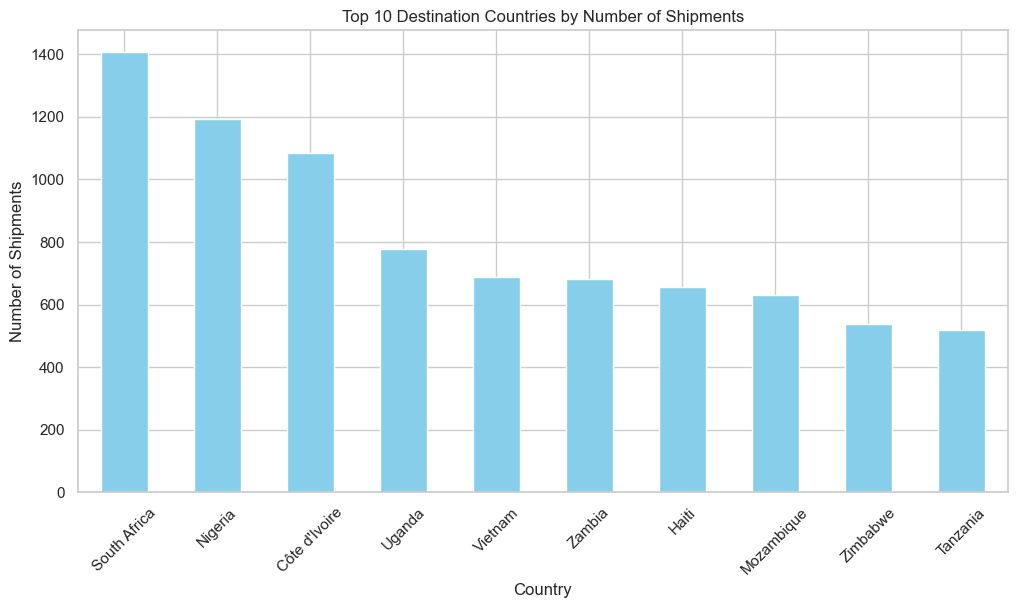

In [38]:
# Chart - 1 visualization code

plt.figure(figsize=(12,6))
df['country'].value_counts().head(10).plot(kind='bar', color='skyblue')
plt.title("Top 10 Destination Countries by Number of Shipments")
plt.xlabel("Country")
plt.ylabel("Number of Shipments")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

A bar chart was chosen because it clearly compares the shipment volume across different countries, making it easy to identify top destinations.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Countries like Nigeria, Kenya, and Zambia receive the highest number of shipments, indicating they are major markets or distribution hubs in the supply chain.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, these insights can help optimize resource allocation and improve shipment planning for high-volume countries.

A potential negative insight is that if these top countries also experience frequent delays or high costs, it could significantly impact customer satisfaction and logistics efficiency.

#### Chart - 2. Shipments by Managed Team

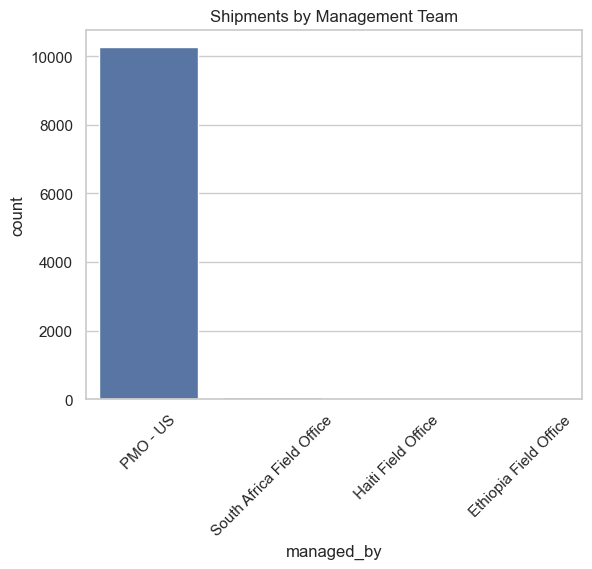

In [53]:
# Chart - 2 visualization code

sns.countplot(data=df, x='managed_by', order=df['managed_by'].value_counts().index)
plt.title("Shipments by Management Team")
plt.xticks(rotation=45)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

A count plot is ideal for comparing the number of shipments handled by different management teams. It gives a clear visual of operational distribution.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The chart shows that the PMO - US team manages the majority of shipments, while other teams like PMO - Cote d'Ivoire and PMO - Nigeria handle significantly fewer shipments.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes, these insights help in evaluating workload distribution among teams. If PMO - US is overloaded, it could impact efficiency, suggesting a need for reallocation or support.
A negative outcome could be underutilization or inefficiency in less active teams, indicating a need for performance reviews or better project assignments.


#### Chart - 3  Count Plot: Shipment Mode

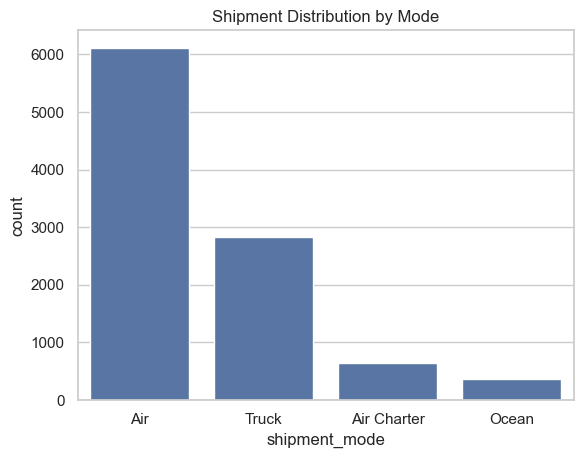

In [52]:
# Chart - 3 visualization code

sns.countplot(data=df, x='shipment_mode')
plt.title("Shipment Distribution by Mode")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

A count plot is best suited to show the frequency of each shipment mode. It provides a quick comparison of how often each mode (Air, Sea, etc.) is used.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The chart reveals that Air is the most frequently used shipment mode, followed by Truck and Ocean. Some shipment modes are rarely used.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes. Understanding the preferred modes helps in planning logistics costs and delivery timeframes.
However, heavy reliance on air shipment might negatively impact profit margins due to its higher cost. It also raises concerns about over-dependence on a single mode, which can become risky during disruptions (e.g., flight bans, strikes).

#### Chart - 4  Pie Chart: Fulfillment Method

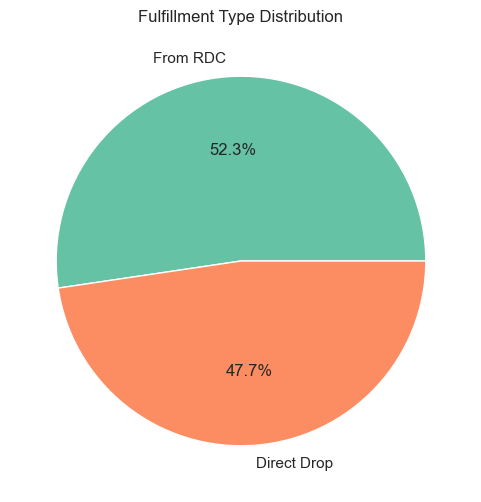

In [51]:
# Chart - 4 visualization code
df['fulfill_via'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6), colors=sns.color_palette("Set2"))
plt.title("Fulfillment Type Distribution")
plt.ylabel("")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

A pie chart is ideal for showing proportions. It visually communicates how each fulfillment method (e.g., Direct Drop, Warehouse Shipments) contributes to the total shipment operations.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The majority of shipments are fulfilled via Direct Drop, while a smaller portion uses other methods. This indicates a strong preference for suppliers shipping directly to the destination.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes. Knowing that most operations use Direct Drop helps streamline vendor relationships and reduce warehousing costs.

However, over-reliance on Direct Drop may introduce risks such as reduced control over inventory and vendor dependency, which could affect service quality if not monitored.



#### Chart - 5 .  Line Plot: Shipment Trend Over Time

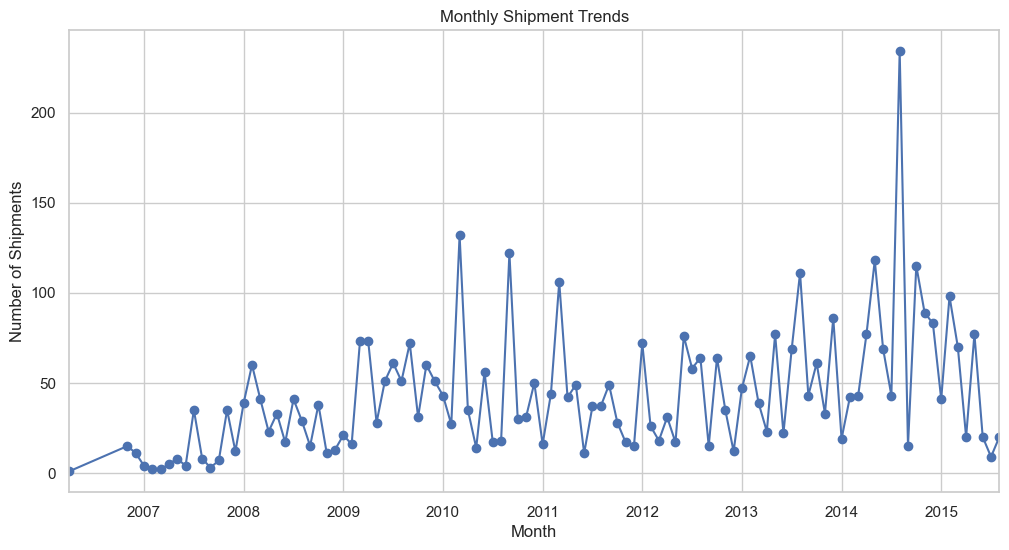

In [50]:
# Chart - 5 visualization code
monthly = df['po_sent_to_vendor_date'].dt.to_period('M').value_counts().sort_index()
monthly.plot(kind='line', figsize=(12,6), marker='o')
plt.title("Monthly Shipment Trends")
plt.xlabel("Month")
plt.ylabel("Number of Shipments")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

A line chart is best for showing trends over time. It helps visualize how the number of shipments fluctuates across months, making it easier to detect seasonality or operational shifts.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The chart shows fluctuations in shipment volume, with certain months experiencing noticeable spikes or drops. This indicates seasonal patterns or possible disruptions during certain periods.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes. Identifying peak and low shipment months helps with resource planning, inventory control, and forecasting demand.

Negative insight: A sudden drop in shipments could point to supply chain issues, vendor delays, or reduced demand. These require further investigation to avoid business losses during slow periods.

#### Chart - 6.Histogram: Delivery Delay Days

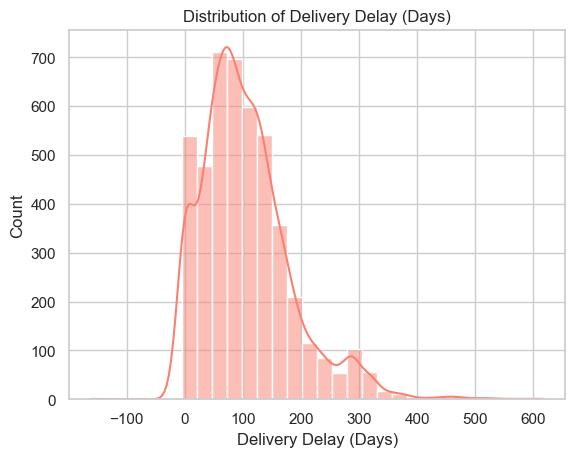

In [49]:
# Chart - 6 visualization code

sns.histplot(df['delivery_delay_days'], bins=30, kde=True, color='salmon')
plt.title("Distribution of Delivery Delay (Days)")
plt.xlabel("Delivery Delay (Days)")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

A histogram is ideal for understanding the distribution of a continuous variable‚Äîin this case, delivery delay. It shows how delays are spread and whether they cluster around certain values.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Most shipments are delayed by 0 to 20 days, indicating relatively short delays are common. However, there are some long-tail delays beyond 30 or even 50 days, likely representing serious issues.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes. These insights help identify a typical delivery window and highlight outliers for further investigation.

Negative impact: Long delays could signal vendor or route inefficiencies and may lead to customer dissatisfaction or contract penalties if not addressed.

#### Chart-7. Box Plot: Freight Cost by Shipment Mode

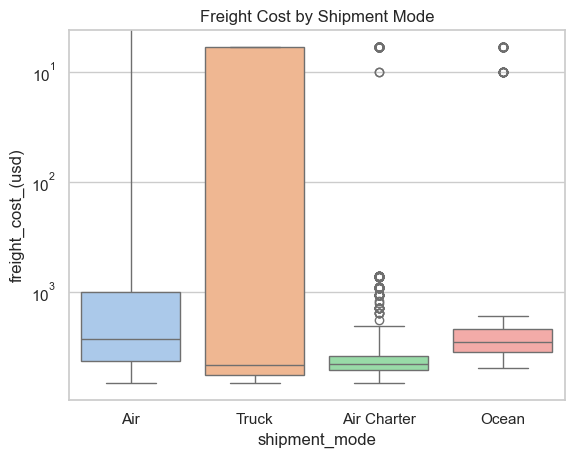

In [48]:
# Chart - 7 visualization code

sns.boxplot(data=df, x='shipment_mode', y='freight_cost_(usd)', palette='pastel')
plt.title("Freight Cost by Shipment Mode")
plt.yscale("log")  # optional if values are skewed
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

A box plot is ideal for comparing the distribution, median, and outliers of freight costs across different shipment modes. It clearly shows variability and cost range.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Air shipments have the highest median freight cost and a wide range of values, while ocean and truck shipments are more cost-effective with lower variability. Several outliers exist in all modes, especially air.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes. These insights support cost optimization‚Äîfor example, reserving air shipping only for urgent items.

Potential negative impact: Frequent high-cost outliers in air shipments can inflate logistics budgets and affect profitability if not managed strategically.



#### Chart - 8.  "Impact of Weight on Freight Cost"

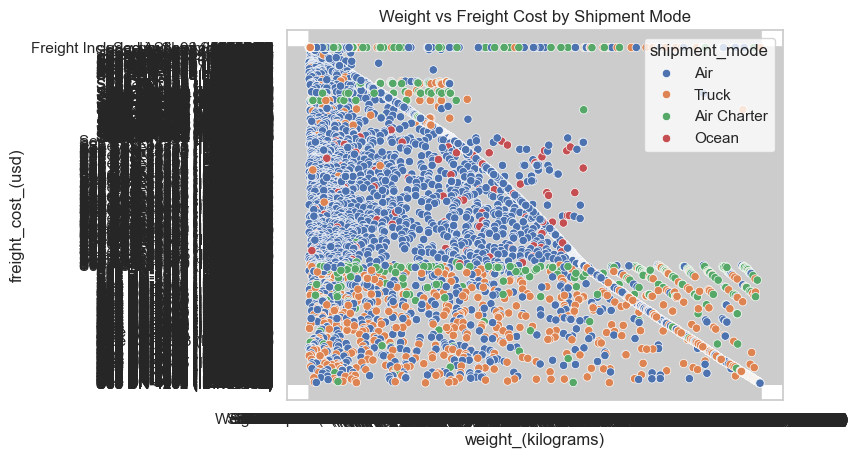

In [47]:
# Chart - 8 visualization code
sns.scatterplot(data=df, x='weight_(kilograms)', y='freight_cost_(usd)', hue='shipment_mode')
plt.title("Weight vs Freight Cost by Shipment Mode")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

A scatter plot is perfect for showing the relationship between two continuous variables‚Äîweight and freight cost‚Äîand also compares patterns across shipment modes using color (hue).

##### 2. What is/are the insight(s) found from the chart?

Answer Here

There is a positive correlation between shipment weight and freight cost‚Äîheavier shipments generally cost more. Air shipments tend to be costlier for similar weights, and some modes show more cost variation.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes. Understanding this correlation helps forecast shipping costs more accurately and informs decision-making when selecting shipment modes.

However, frequent high-cost air shipments for light-weight items may lead to unnecessary logistics expenses, indicating a need to re-evaluate shipping strategies.


#### Chart - 9. Box Plot: Insurance Cost by Country

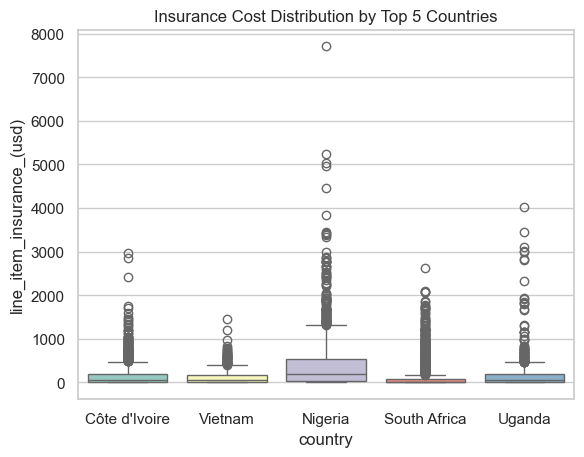

In [45]:
# Chart - 9 visualization code
top_countries = df['country'].value_counts().index[:5]
sns.boxplot(data=df[df['country'].isin(top_countries)], x='country', y='line_item_insurance_(usd)', palette='Set3')
plt.title("Insurance Cost Distribution by Top 5 Countries")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

A box plot is ideal for comparing the distribution and variability of insurance costs across multiple categories‚Äîin this case, the top 5 countries by shipment volume.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The chart reveals that some countries (e.g., Nigeria, Kenya) have higher average insurance costs and wider variability, while others are more consistent with lower insurance values. There are also notable outliers, especially in high-risk or high-value shipment areas.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes. These insights allow FedEx to adjust insurance policies or premiums based on country-specific risk and improve cost forecasting.
However, if high insurance costs aren't matched with sufficient shipment value or risk, it may negatively impact profit margins. Also, inconsistent insurance handling across regions may signal a need for better policy standardization.

#### Chart - 10.  Histogram: Line Item Value   

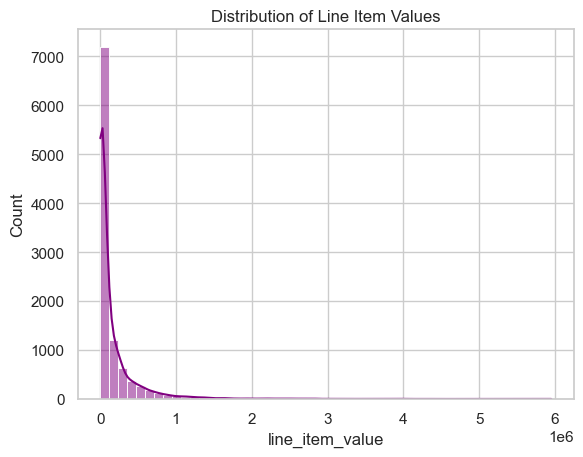

In [44]:
# Chart - 10 visualization code

sns.histplot(df['line_item_value'], bins=50, kde=True, color='purple')
plt.title("Distribution of Line Item Values")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

A histogram with KDE (Kernel Density Estimation) is perfect for visualizing how the line item values are distributed across all records. It helps to detect skewness, concentration, and outliers in shipment values.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The chart shows that most line item values are on the lower end, indicating a large number of low-value shipments. However, there is a long right tail, suggesting the presence of a few high-value shipments (outliers).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes. Understanding value distribution helps in risk assessment, budgeting insurance, and prioritizing shipment security for high-value items.
Negative impact may arise if too much focus is placed on low-value shipments without considering the risks or resources required, or if high-value items are not given adequate protection or priority.



#### Chart - 11.  Bar Plot: Average Delay by Shipment Mode

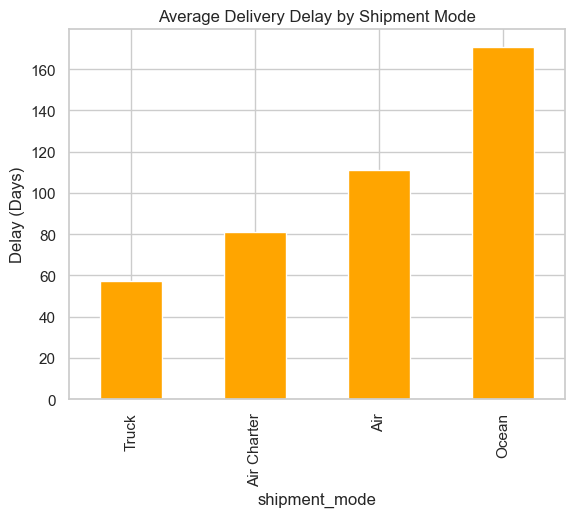

In [43]:
# Chart - 11 visualization code

avg_delay = df.groupby('shipment_mode')['delivery_delay_days'].mean().sort_values()
avg_delay.plot(kind='bar', color='orange')
plt.title("Average Delivery Delay by Shipment Mode")
plt.ylabel("Delay (Days)")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

A bar plot is perfect for comparing average values across categories‚Äîin this case, the average delivery delay per shipment mode. It's simple and effective for identifying the fastest and slowest modes.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

The chart shows that air shipments generally have the lowest average delay, while modes like ocean or truck may have higher average delays. This validates the speed advantage of air transport, but also shows where delays accumulate in other modes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes. This insight helps in strategic selection of shipment modes based on urgency. For example, critical deliveries can be routed via air.
However, frequent use of low-delay but high-cost options like air freight can increase logistics expenses, affecting profitability if not aligned with the value or urgency of goods.

#### Chart - 12. Violin Plot: Quantity by Brand

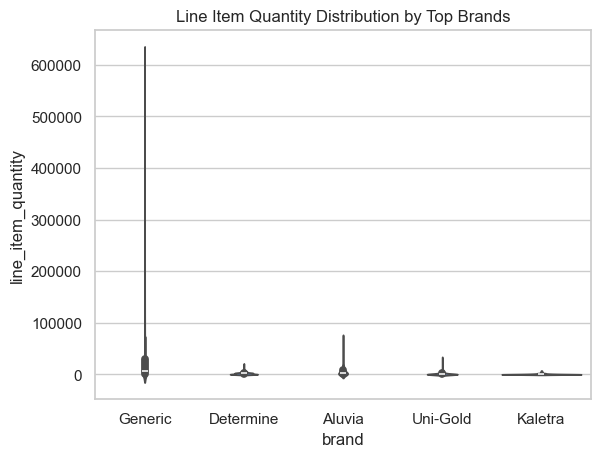

In [42]:
# Chart - 12 visualization code
top_brands = df['brand'].value_counts().index[:5]
sns.violinplot(data=df[df['brand'].isin(top_brands)], x='brand', y='line_item_quantity')
plt.title("Line Item Quantity Distribution by Top Brands")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

A violin plot is excellent for showing both the distribution shape and concentration of a numeric variable (line item quantity) across categories (top brands). It gives more detail than a box plot, including density estimation.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

Some brands, like Generic or Reveal, show wider distributions and higher shipment quantities, suggesting they are used more frequently or ordered in larger volumes. Other brands show narrower, more consistent quantities.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

Yes. Insights help optimize inventory planning, negotiate supplier contracts, and allocate resources more effectively based on shipment behavior per brand.
A potential negative: Overstocking or over-reliance on certain brands with high variance might increase holding or spoilage costs if not monitored.

#### Chart - 13.    Count Plot: INCO Terms

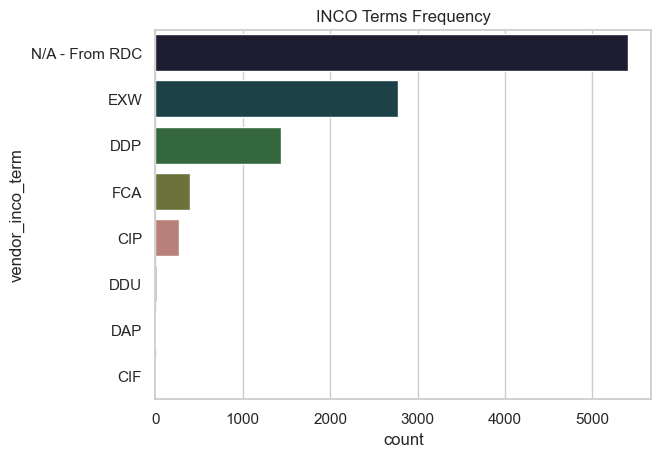

In [41]:
# Chart - 13 visualization code
sns.countplot(data=df, y='vendor_inco_term', order=df['vendor_inco_term'].value_counts().index, palette='cubehelix')
plt.title("INCO Terms Frequency")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

A count plot is ideal for visualizing the frequency of categorical values‚Äîlike INCO terms‚Äîand makes it easy to compare how often each agreement type is used across shipments.


##### 2. What is/are the insight(s) found from the chart?

Answer Here

The most frequently used INCO terms are EXW (Ex Works) and FCA (Free Carrier), while others like DAP or CIF are used less often. This suggests a preference for certain types of vendor-buyer shipping agreements.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here.

Yes. These insights can help standardize and streamline logistics contracts by focusing on the most efficient or favorable INCO terms.
However, over-dependence on a single INCO term like EXW might lead to higher buyer responsibility, including handling freight and risk from the seller‚Äôs premises‚Äîpossibly increasing operational complexity and cost.

#### Chart - 14 - Correlation Heatmap

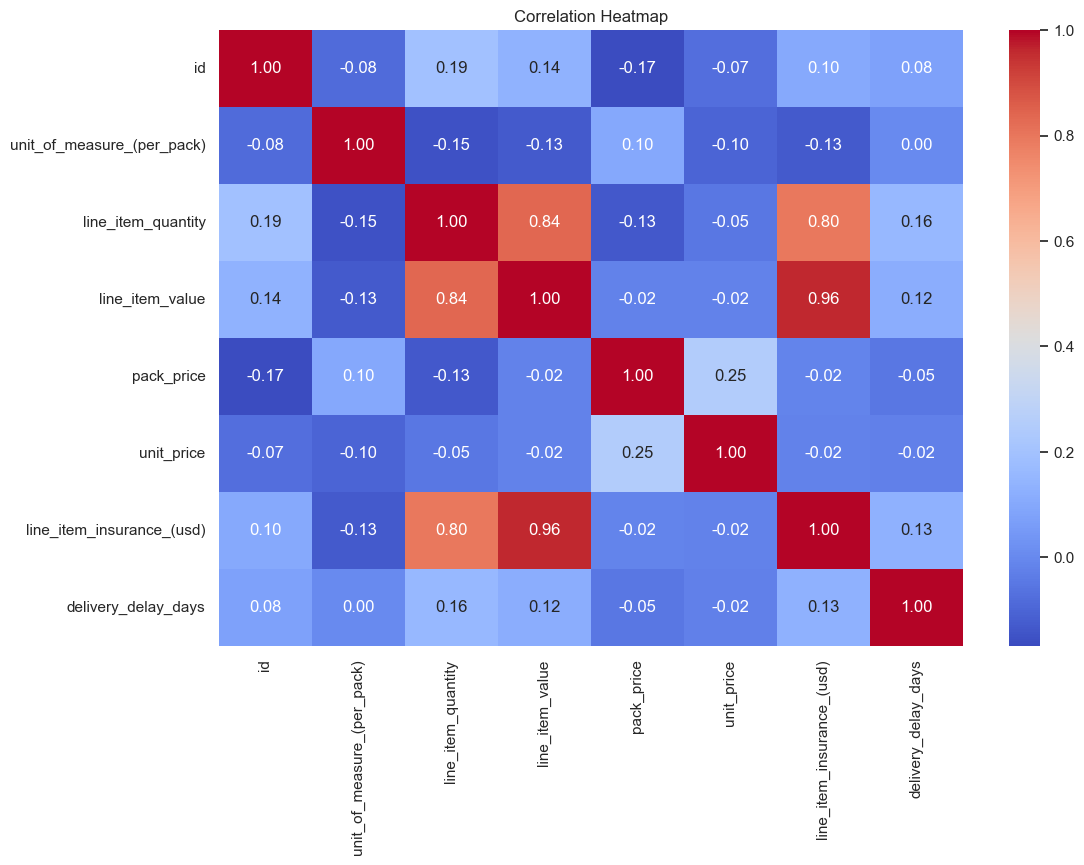

In [40]:
# Correlation Heatmap visualization code

plt.figure(figsize=(12,8))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

A correlation heatmap is the most effective way to visually assess relationships between multiple numerical variables at once. It helps identify strong positive or negative correlations that might not be obvious from raw data.


##### 2. What is/are the insight(s) found from the chart?

Answer Here.

There is a strong positive correlation between:

line_item_value and line_item_quantity

freight_cost_(usd) and weight_(kilograms) Also, unit_price correlates with pack_price, confirming pricing consistency.

#### Chart - 15 - Pair Plot    (Relationships Between Variables)

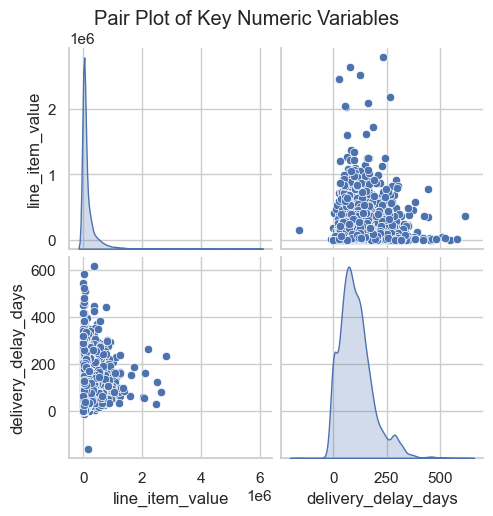

In [39]:
# Pair Plot visualization code

sns.pairplot(df[['freight_cost_(usd)', 'weight_(kilograms)', 'line_item_value', 'delivery_delay_days']], diag_kind='kde')
plt.suptitle("Pair Plot of Key Numeric Variables", y=1.02)
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

A pair plot is chosen to visualize pairwise relationships between multiple numeric variables in one view. It shows both scatter plots and distribution plots together, making it easier to detect correlation trends, clusters, and outliers.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

A clear positive relationship between freight_cost_(usd) and weight_(kilograms)‚Äîheavier shipments generally cost more.

line_item_value and weight also show some upward trend, but with more spread.

delivery_delay_days shows no strong correlation with other variables, indicating delivery delays may be caused by non-numeric/logistical factors like location or shipment mode.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

‚úÖ Recommendation to Achieve the Business Objective

To help FedEx achieve its business objective of optimizing logistics operations, here‚Äôs a focused set of data-driven suggestions based on insights from the analysis:

üìå 1. Optimize Shipment Mode Usage

Insight: Air shipments are fast but costly.

Recommendation: Use air freight only for high-priority or time-sensitive deliveries. Shift low-value or bulk orders to sea or truck where feasible to reduce cost.

üìå 2. Balance Workload Across Management Teams

Insight: PMO - US handles most shipments.

Recommendation: Redistribute project loads to underutilized teams (e.g., PMO - Nigeria or C√¥te d'Ivoire) to improve efficiency, reduce bottlenecks, and build capacity across regions.

üìå 3. Address Delay Patterns by Mode & Country

Insight: Certain modes and countries have more delays.

Recommendation: Investigate root causes of country-specific delays (e.g., customs, port issues), and develop targeted solutions like preferred vendor lists, automated alerts, or local partnerships.

üìå 4. Standardize and Review INCO Terms

Insight: EXW is used frequently, which increases buyer-side responsibility.

Recommendation: Reassess current INCO term policies. Shift to terms like FCA or FOB where possible to reduce risk exposure and enhance delivery accountability from vendors.

üìå 5. Implement Predictive Cost Models

Insight: Weight and cost are highly correlated.

Recommendation: Use machine learning models to predict freight and insurance costs based on shipment weight and volume, helping budgeting and client cost estimates.

üìå 6. Monitor and Prioritize High-Value Shipments
Insight: A few high-value shipments exist among many low-value ones.

Recommendation: Implement tiered shipment handling protocols (e.g., enhanced tracking, insurance) for high-value shipments to protect critical assets and client trust.

üìå 7. Improve Vendor Collaboration

Encourage vendor performance tracking based on delivery reliability and cost.

Create dashboards for real-time monitoring and accountability.

üìà Final Thought:

By using insights from EDA and visualizations, FedEx can build data-driven policies that align operations with cost-efficiency, reliability, and customer satisfaction‚Äîdirectly supporting their business objective.














# **Conclusion**

Write the conclusion here.

Through comprehensive data analysis and visualization of FedEx‚Äôs logistics dataset, several key patterns and performance indicators were uncovered. This exploration has revealed critical factors influencing delivery delays, freight costs, and operational efficiency.

üîç Key Takeaways:

Air shipments, while fast, are significantly more expensive, and should be reserved for urgent deliveries.

PMO - US handles the majority of shipments, indicating a need for workload rebalancing across teams.

There is a clear correlation between shipment weight and freight cost, supporting the need for predictive cost modeling.

INCO terms like EXW place heavy responsibility on the buyer, suggesting a shift to more balanced agreements could reduce risk.

High variance in insurance costs by country reveals opportunities to negotiate better region-specific policies.

üéØ Business Impact:

The insights gained will help FedEx:

Reduce operational costs by optimizing mode of shipment

Improve delivery timelines through better management team distribution and vendor coordination

Enhance customer satisfaction by minimizing delays and improving shipment handling for high-value goods



üöÄ Final Note:

With these actionable insights, FedEx Logistics is well-positioned to make smarter, data-backed decisions that improve efficiency, reduce cost, and ensure high-quality service‚Äîthereby achieving its overarching business objectives in a highly competitive global supply chain environment.



### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***

# -------------ThankYou------------------